<a href="https://colab.research.google.com/github/david-j-cox/Man-vs-Machine/blob/master/Single_Alt_Fit_Analyses_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Packages!!
import os
import sys
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
upload = files.upload()
# Read in the data
all_fits = pd.read_csv('all_fits.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
all_fits

,person_num,reinforcer,fit_type,est_k,est_re,vac,city
0,3bb3b1bd48,citations,overall,6.394477,1.000000,-0.5598,Pittsburgh
1,3bb3b1bd48,citations,black,1.032873,1.000000,-0.4828,Pittsburgh
2,3bb3b1bd48,citations,white,10.328731,1.000000,0.2479,Pittsburgh
3,b62aedb5bb,citations,overall,260183.412663,61738.400697,-1.0190,Pittsburgh
4,b62aedb5bb,citations,black,0.133840,0.023481,-0.0609,Pittsburgh
...,...,...,...,...,...,...,...
384588,00fd1ebe22,arrests,overall,1.000000,1.000000,-3.2000,Nashville
384589,00fd1ebe22,arrests,black,1.000000,1.000000,-1.0000,Nashville
384590,00fd1ebe22,arrests,other,1.000000,1.000000,-0.3333,Nashville
384591,00fd1ebe22,arrests,white,1.000000,1.000000,-0.5814,Nashville


In [4]:
#%% Info for each specific reinforcer
cite_fits = all_fits[(all_fits['reinforcer']=='citations')]
search_fits = all_fits[(all_fits['reinforcer']=='searches')]
frisk_fits = all_fits[(all_fits['reinforcer']=='frisks')]
contra_fits = all_fits[(all_fits['reinforcer']=='contraband')]
arrest_fits = all_fits[(all_fits['reinforcer']=='arrests')]

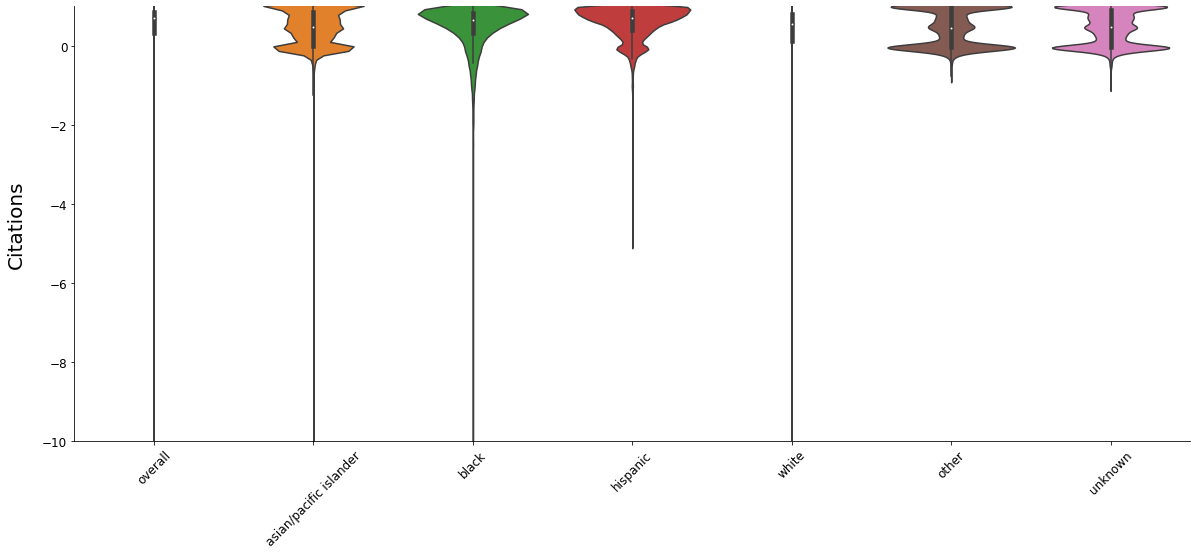

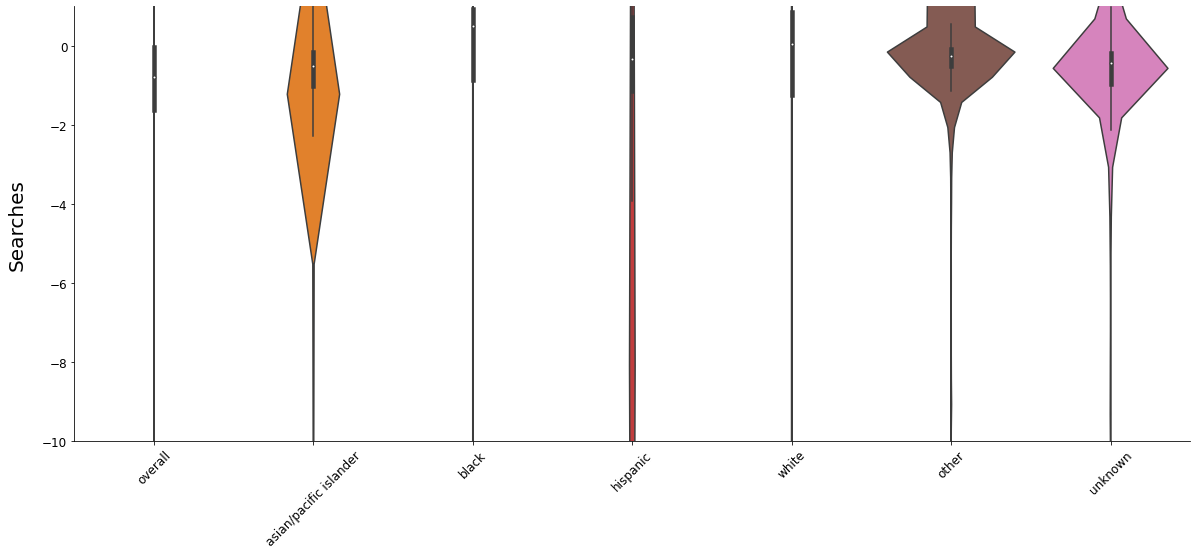

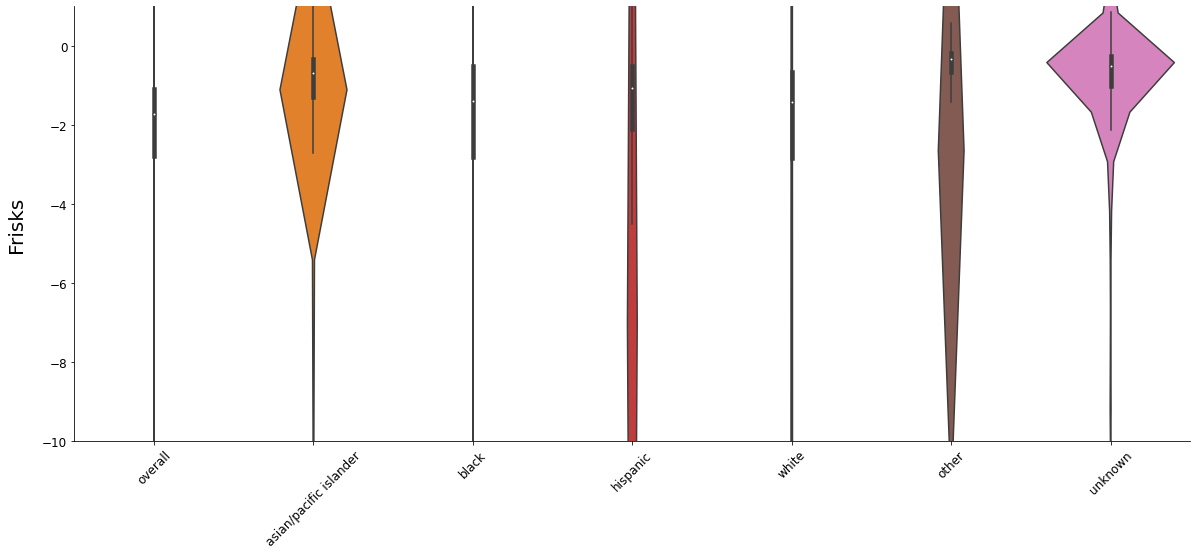

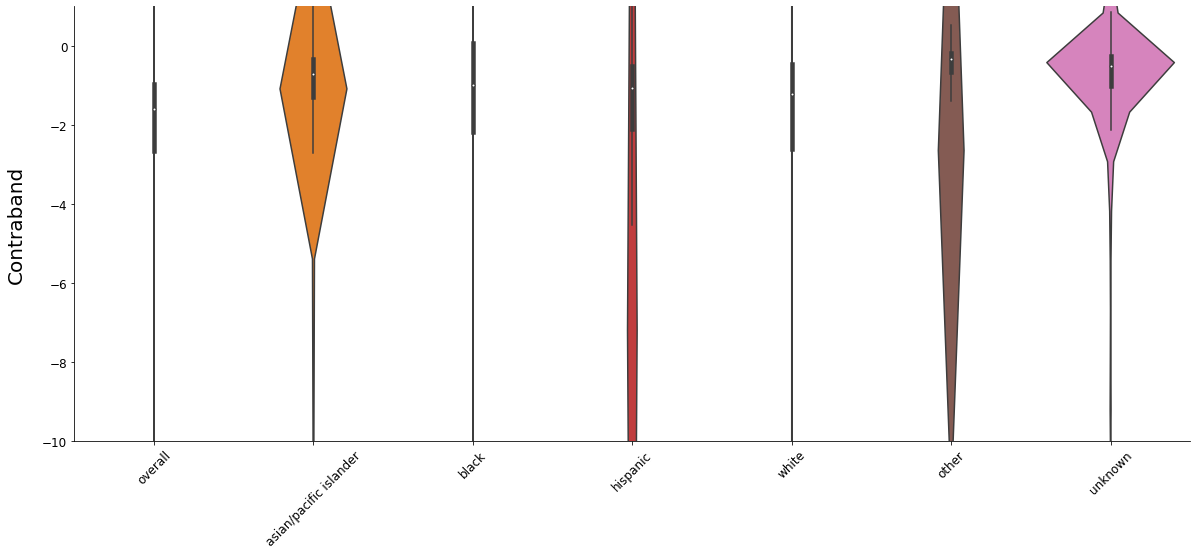

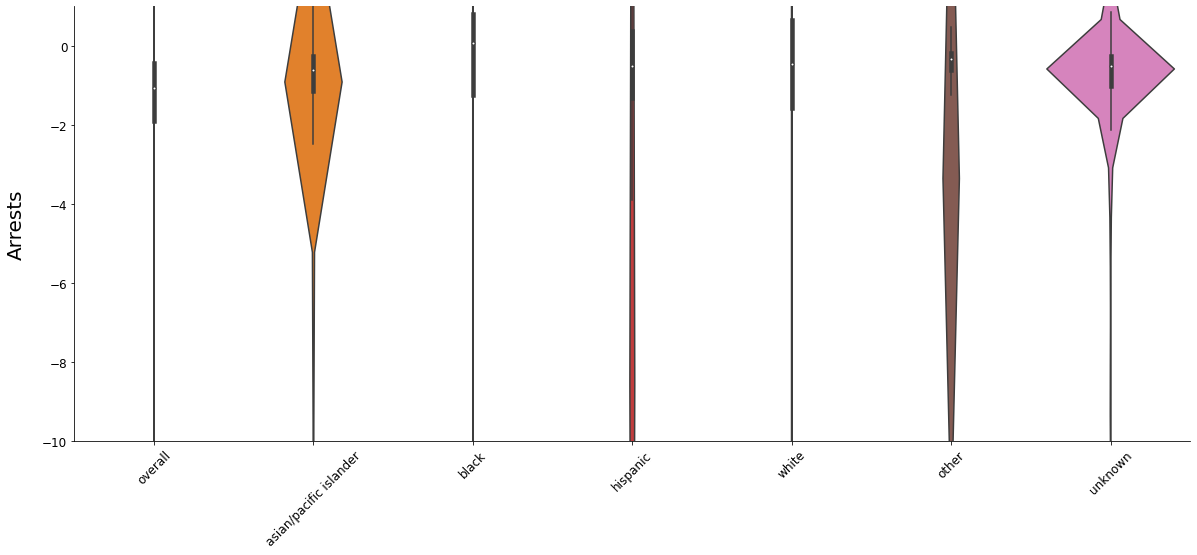

In [ ]:
#%% Violin plots of fit distributions
def violin(df, y_label):
  f, ax = plt.subplots(figsize=(20, 8))
  sns.violinplot(x='fit_type', y='vac', data=df, order=['overall', 'asian/pacific islander', 'black', 'hispanic', 
                                                        'white', 'other', 'unknown'])
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=20, labelpad=(16))
  plt.ylim(-10, 1)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12, rotation=45)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()

violin(cite_fits, 'Citations')
violin(search_fits, 'Searches')
violin(frisk_fits, 'Frisks')
violin(contra_fits, 'Contraband')
violin(arrest_fits, 'Arrests')

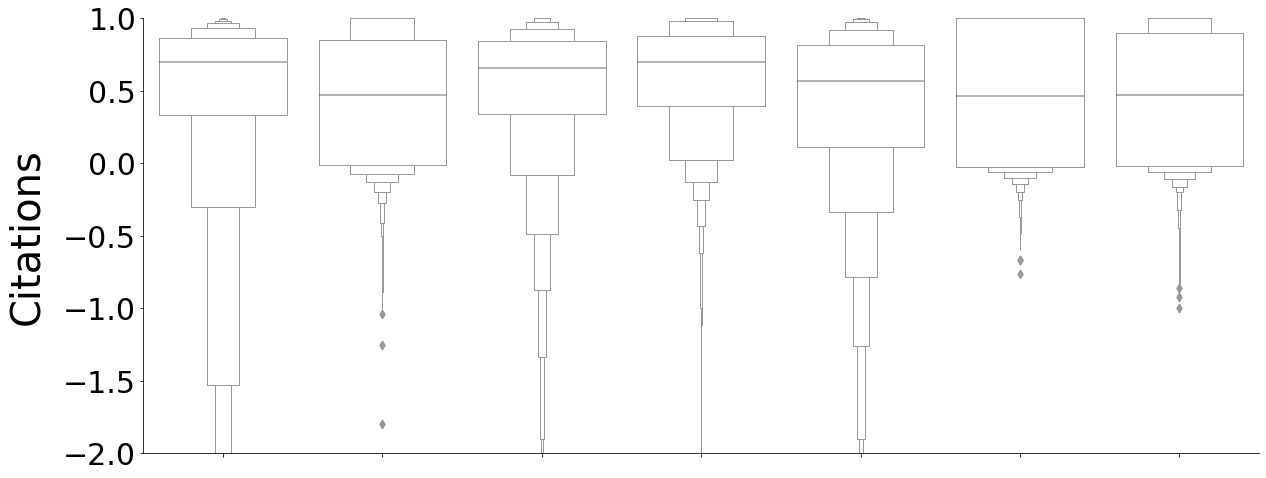

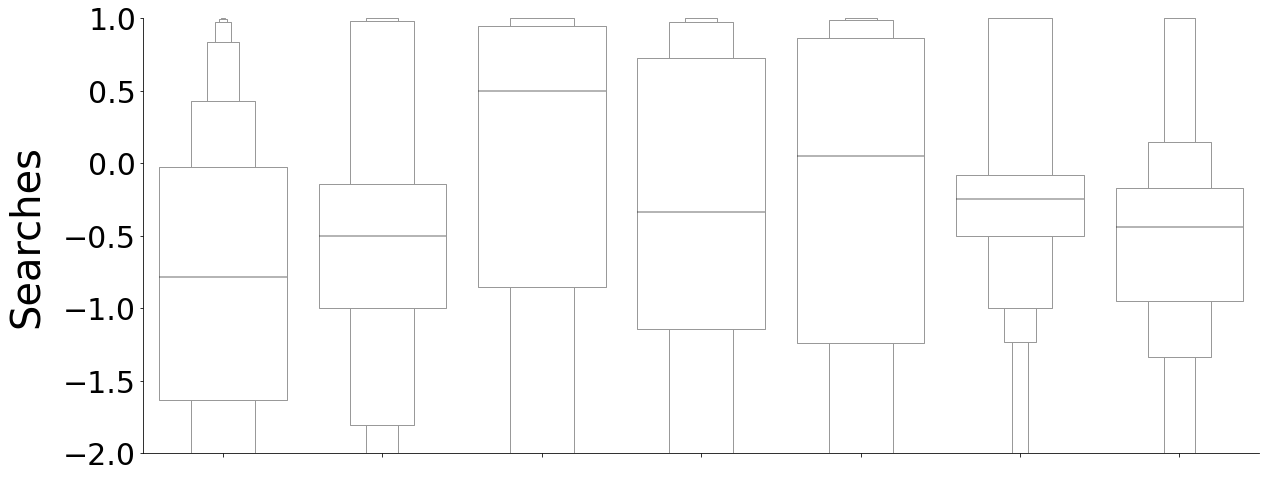

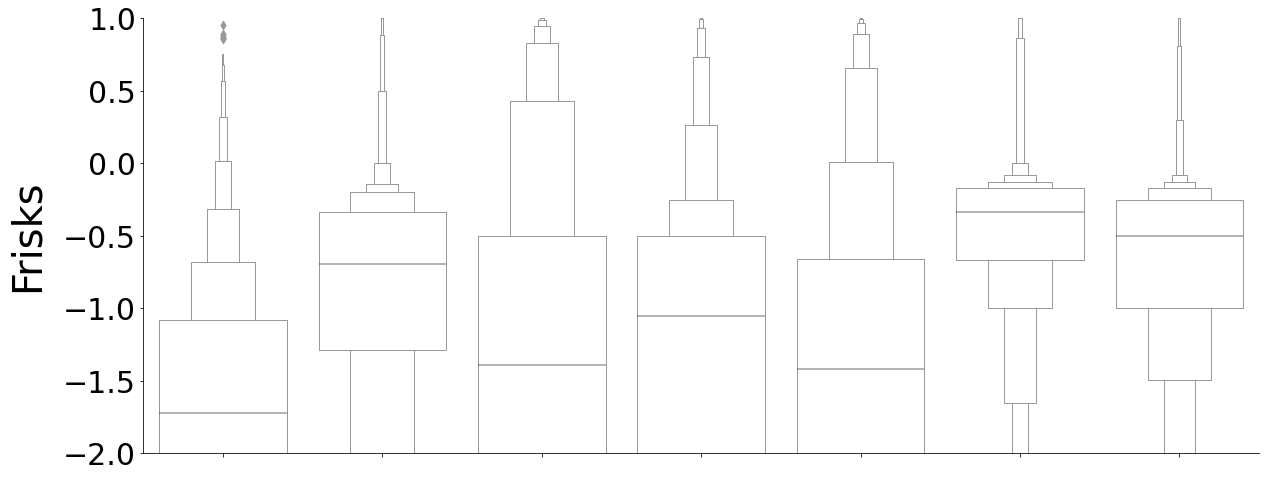

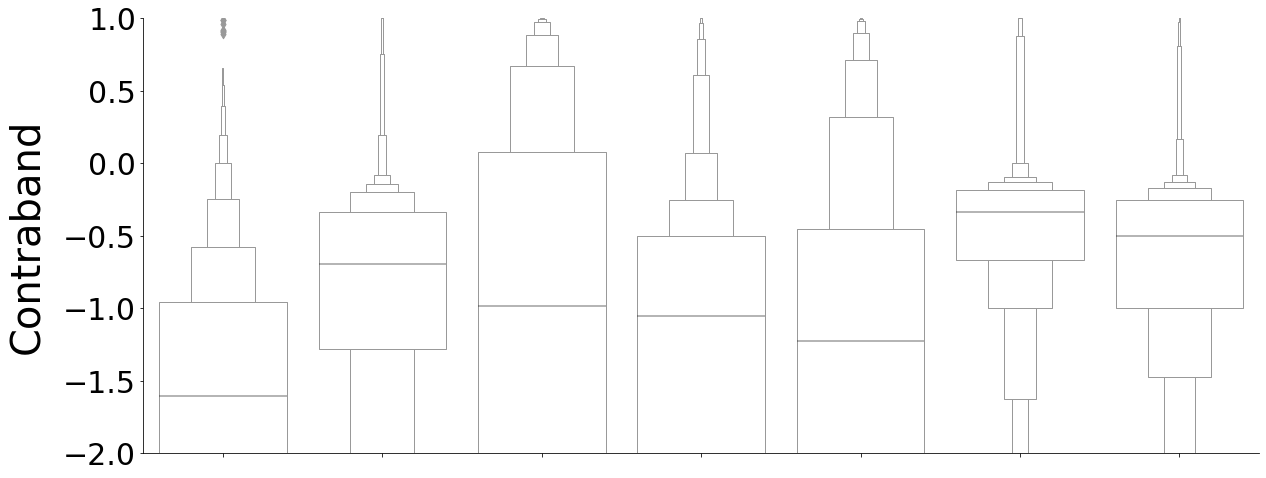

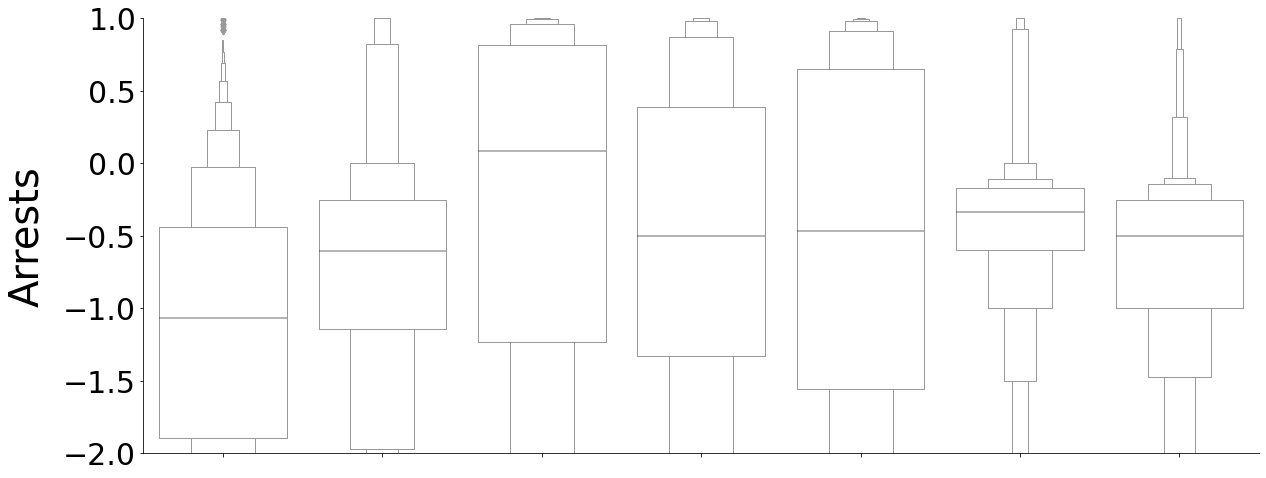

In [ ]:
#%% Try boxen here
def boxen(df, y_label):
  f, ax = plt.subplots(figsize=(20, 8))
  sns.boxenplot(x='fit_type', y='vac', data=df, color='white', order=['overall', 'asian/pacific islander', 'black', 
                                                                      'hispanic', 'white', 'other', 'unknown'])
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.xticks(fontsize=1, color='white')
  plt.ylabel(y_label, fontsize=40, labelpad=(16))
  plt.ylim(-2, 1)
  plt.yticks(fontsize=30)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()
  
boxen(cite_fits, 'Citations')
boxen(search_fits, 'Searches')
boxen(frisk_fits, 'Frisks')
boxen(contra_fits, 'Contraband')
boxen(arrest_fits, 'Arrests')

In [5]:
#%% Some unique hash ids were generated across multiple departments. Create unique id using city and hash id
all_fits['unique_id'] = all_fits['person_num'] + "_" + all_fits['city']
all_fits.head(20)

,person_num,reinforcer,fit_type,est_k,est_re,vac,city,unique_id
0,3bb3b1bd48,citations,overall,6.394477,1.000000,-0.5598,Pittsburgh,3bb3b1bd48_Pittsburgh
1,3bb3b1bd48,citations,black,1.032873,1.000000,-0.4828,Pittsburgh,3bb3b1bd48_Pittsburgh
2,3bb3b1bd48,citations,white,10.328731,1.000000,0.2479,Pittsburgh,3bb3b1bd48_Pittsburgh
3,b62aedb5bb,citations,overall,260183.412663,61738.400697,-1.0190,Pittsburgh,b62aedb5bb_Pittsburgh
4,b62aedb5bb,citations,black,0.133840,0.023481,-0.0609,Pittsburgh,b62aedb5bb_Pittsburgh
5,b62aedb5bb,citations,other,1.000000,1.000000,-0.0882,Pittsburgh,b62aedb5bb_Pittsburgh
6,b62aedb5bb,citations,unknown,1.000000,1.000000,-0.0278,Pittsburgh,b62aedb5bb_Pittsburgh
7,b62aedb5bb,citations,white,6.352992,2.508268,-1.0487,Pittsburgh,b62aedb5bb_Pittsburgh
8,1ccb6bd45a,citations,overall,1.000000,1.000000,-2.0000,Pittsburgh,1ccb6bd45a_Pittsburgh
9,1ccb6bd45a,citations,black,1.000000,1.000000,-0.5714,Pittsburgh,1ccb6bd45a_Pittsburgh


In [6]:
#%% Info for each specific reinforcer
cite_fits = all_fits[(all_fits['reinforcer']=='citations')]
search_fits = all_fits[(all_fits['reinforcer']=='searches')]
frisk_fits = all_fits[(all_fits['reinforcer']=='frisks')]
contra_fits = all_fits[(all_fits['reinforcer']=='contraband')]
arrest_fits = all_fits[(all_fits['reinforcer']=='arrests')]

In [7]:
#%% Separate out the different dfs for different events
ninety_fit = all_fits[(all_fits['vac']>=0.90)]
print(len(ninety_fit.unique_id.unique()))
print(len(ninety_fit.unique_id.unique())/(72594))
eighty_fit = all_fits[(all_fits['vac']>=0.80)]
print(len(eighty_fit.unique_id.unique()))
print(len(eighty_fit.unique_id.unique())/(72594))

8141
0.11214425434608921
9465
0.13038267625423589


In [8]:
ninety_fit.groupby(by=['fit_type', 'reinforcer']).count()

person_num  est_k  ...  city  unique_id
fit_type               reinforcer                     ...                 
asian/pacific islander arrests            563    563  ...   563        563
                       citations         3292   3292  ...  3292       3292
                       contraband          53     53  ...    53         53
                       frisks              69     69  ...    69         69
                       searches          1178   1178  ...  1178       1178
black                  arrests           2513   2513  ...  2513       2513
                       citations         3324   3324  ...  3324       3324
                       contraband         652    652  ...   652        652
                       frisks             516    516  ...   516        516
                       searches          3399   3399  ...  3399       3399
hispanic               arrests           1394   1394  ...  1394       1394
                       citations         4006   4006  ...  4006       4006
                       contraband         133    133  ...   133        133
                       frisks             193    193  ...   193        193
                       searches          1845   1845  ...  1845       1845
other                  arrests            176    176  ...   176        176
                       citations         1954   1954  ...  1954       1954
                       contraband          64     64  ...    64         64
                       frisks              64     64  ...    64         64
                       searches           853    853  ...   853        853
overall                arrests             12     12  ...    12         12
                       citations         3964   3964  ...  3964       3964
                       contraband           6      6  ...     6          6
                       frisks               1      1  ...     1          1
                       searches           687    687  ...   687        687
unknown                arrests            100    100  ...   100        100
                       citations         2576   2576  ...  2576       2576
                       contraband          36     36  ...    36         36
                       frisks              43     43  ...    43         43
                       searches           542    542  ...   542        542
white                  arrests           1797   1797  ...  1797       1797
                       citations         3098   3098  ...  3098       3098
                       contraband         358    358  ...   358        358
                       frisks             343    343  ...   343        343
                       searches          2609   2609  ...  2609       2609

[35 rows x 6 columns]

In [9]:
eighty_fit.groupby(by=['fit_type', 'reinforcer']).count()

person_num  est_k  ...  city  unique_id
fit_type               reinforcer                     ...                 
asian/pacific islander arrests            684    684  ...   684        684
                       citations         4190   4190  ...  4190       4190
                       contraband          64     64  ...    64         64
                       frisks              92     92  ...    92         92
                       searches          1312   1312  ...  1312       1312
black                  arrests           3449   3449  ...  3449       3449
                       citations         6416   6416  ...  6416       6416
                       contraband         991    991  ...   991        991
                       frisks             795    795  ...   795        795
                       searches          4216   4216  ...  4216       4216
hispanic               arrests           1866   1866  ...  1866       1866
                       citations         6670   6670  ...  6670       6670
                       contraband         203    203  ...   203        203
                       frisks             272    272  ...   272        272
                       searches          2326   2326  ...  2326       2326
other                  arrests            194    194  ...   194        194
                       citations         2138   2138  ...  2138       2138
                       contraband          70     70  ...    70         70
                       frisks              75     75  ...    75         75
                       searches           874    874  ...   874        874
overall                arrests             46     46  ...    46         46
                       citations         7828   7828  ...  7828       7828
                       contraband          11     11  ...    11         11
                       frisks              15     15  ...    15         15
                       searches           827    827  ...   827        827
unknown                arrests            121    121  ...   121        121
                       citations         3076   3076  ...  3076       3076
                       contraband          52     52  ...    52         52
                       frisks              52     52  ...    52         52
                       searches           583    583  ...   583        583
white                  arrests           2521   2521  ...  2521       2521
                       citations         5448   5448  ...  5448       5448
                       contraband         537    537  ...   537        537
                       frisks             517    517  ...   517        517
                       searches          3277   3277  ...  3277       3277

[35 rows x 6 columns]

In [10]:
cite_90 = cite_fits[cite_fits['vac']>=0.90]
print("Citations:", len(cite_90.unique_id.unique())/72594)
searches_90 = search_fits[search_fits['vac']>=0.90]
print("Searches:", len(searches_90.unique_id.unique())/72594)
frisks_90 = frisk_fits[frisk_fits['vac']>=0.90]
print("Frisks:", len(frisks_90.unique_id.unique())/72594)
contra_90 = contra_fits[contra_fits['vac']>=0.90]
print("Contraband:", len(contra_90.unique_id.unique())/72594)
arrest_90 = arrest_fits[arrest_fits['vac']>=0.90]
print("Arrests:", len(arrest_90.unique_id.unique())/72594)

Citations: 0.07006088657464804
Searches: 0.06424773397250462
Frisks: 0.012618122709865828
Contraband: 0.014904813069950685
Arrests: 0.04537565088023804


In [30]:
ninety_fit.groupby(by=['city']).count()

,person_num,reinforcer,fit_type,est_k,est_re,vac,unique_id
city,,,,,,,
Charlotte,4728,4728,4728,4728,4728,4728,4728
Durham,1927,1927,1927,1927,1927,1927,1927
Fayetteville,3860,3860,3860,3860,3860,3860,3860
Greensboro,3391,3391,3391,3391,3391,3391,3391
NJ,10806,10806,10806,10806,10806,10806,10806
Nashville,3341,3341,3341,3341,3341,3341,3341
Pittsburgh,6111,6111,6111,6111,6111,6111,6111
Raleigh,3067,3067,3067,3067,3067,3067,3067
WinstonSalem,5182,5182,5182,5182,5182,5182,5182


In [32]:
testing = (ninety_fit.groupby(by=['city']).count()) / (all_fits.groupby(by=['city']).count())
testing

,person_num,reinforcer,fit_type,est_k,est_re,vac,unique_id
city,,,,,,,
Charlotte,0.062147,0.062147,0.062147,0.062147,0.062147,0.062147,0.062147
Durham,0.073916,0.073916,0.073916,0.073916,0.073916,0.073916,0.073916
Fayetteville,0.116426,0.116426,0.116426,0.116426,0.116426,0.116426,0.116426
Greensboro,0.081428,0.081428,0.081428,0.081428,0.081428,0.081428,0.081428
NJ,0.208184,0.208184,0.208184,0.208184,0.208184,0.208184,0.208184
Nashville,0.058186,0.058186,0.058186,0.058186,0.058186,0.058186,0.058186
Pittsburgh,0.207237,0.207237,0.207237,0.207237,0.207237,0.207237,0.207237
Raleigh,0.081948,0.081948,0.081948,0.081948,0.081948,0.081948,0.081948
WinstonSalem,0.164990,0.164990,0.164990,0.164990,0.164990,0.164990,0.164990


In [11]:
val_counts = ninety_fit.drop_duplicates(['unique_id', 'reinforcer'])
val_counts = val_counts['unique_id'].value_counts()
xs = list(range(1, 6))
heights = val_counts.value_counts()
heights = heights.sort_index()

In [12]:
fig, ax = plt.subplots(figsize=(10,7.5))
plt.bar(x=xs, height=heights, color='k')
plt.xlabel('Number of Reinforcers where VAC >= 90%', fontsize=26, labelpad=(16))
plt.xticks([1, 2, 3, 4, 5],fontsize=14)
plt.xlim(0.5, 5.5)
plt.ylabel('Number of Officers', fontsize=30, labelpad=(16))
plt.yticks(fontsize=12)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.show()

In [13]:
heights

1    4145
2    1834
3    1495
4     591
5      76
Name: unique_id, dtype: int64

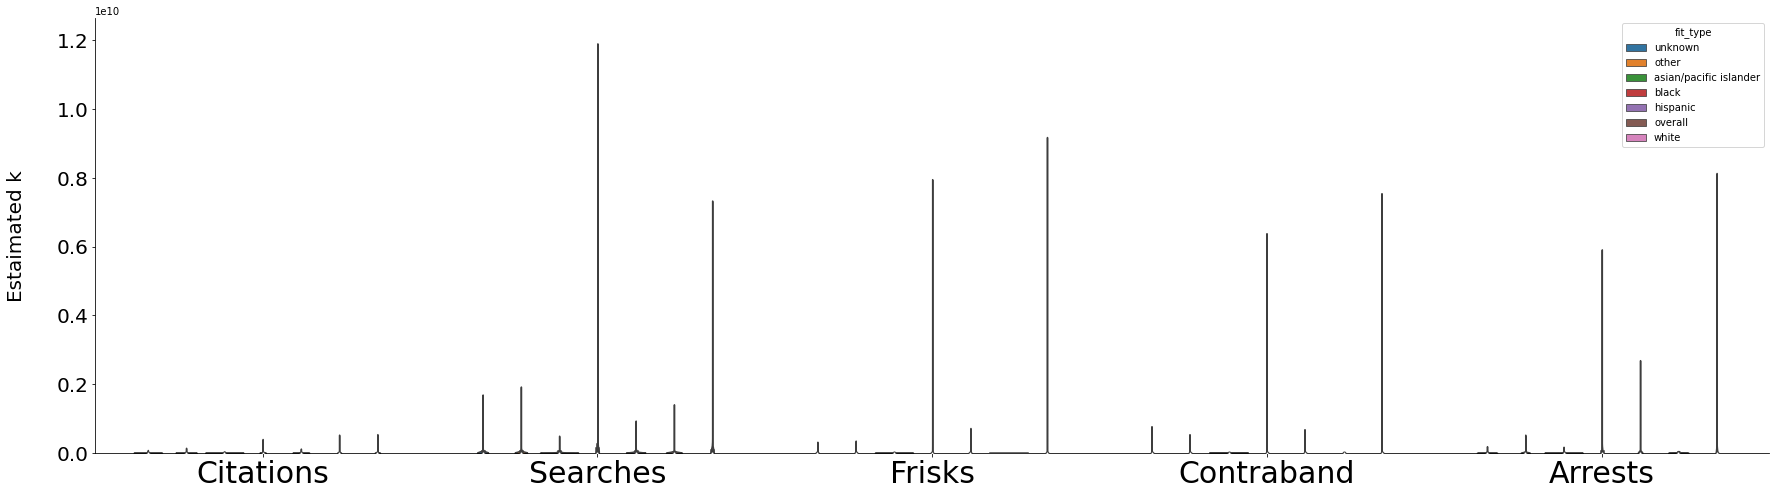

In [ ]:
#%% Violin plots of fit distributions
def violin_2(df, y_label, x_type, y_col, hue_col=None):
  f, ax = plt.subplots(figsize=(30, 8))
  sns.violinplot(x=x_type, y=y_col, data=df, hue=hue_col)
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=20, labelpad=(30))
  plt.ylim(0, )
  plt.yticks(fontsize=20)
  plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Citations', 'Searches', 'Frisks', 'Contraband', 'Arrests'], fontsize=30)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()

violin_2(df=ninety_fit, y_label='Estaimated k', x_type='reinforcer', y_col='est_k', hue_col='fit_type')

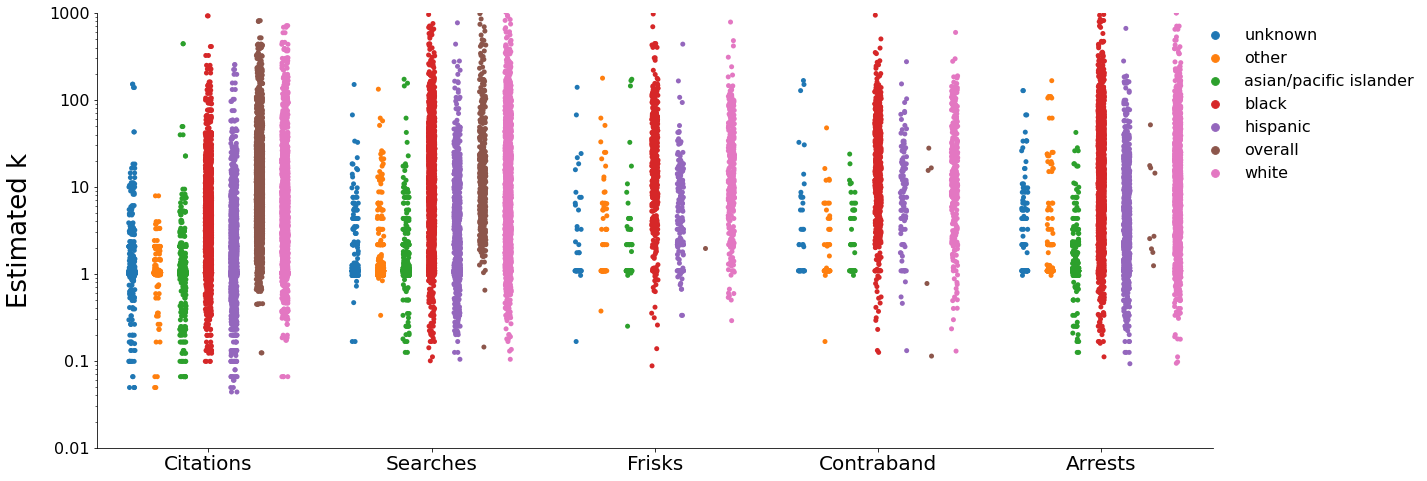

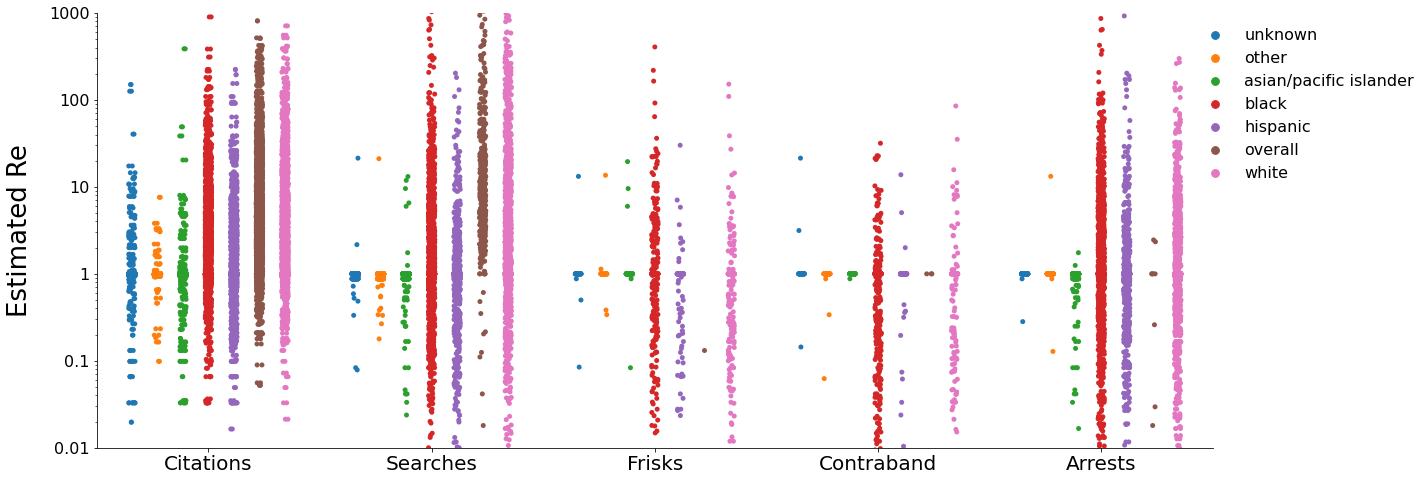

In [22]:
#%% Stripplots of fit distributions
def strip_plot(df, y_label, x_type, y_col, hue_col=None, color=None):
  f, ax = plt.subplots(figsize=(20, 8))
  sns.stripplot(x=x_type, y=y_col, data=df, hue=hue_col, dodge=True)
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=26, labelpad=(16))
  plt.ylim(.01, 1000)
  plt.yscale('log')
  plt.yticks(ticks=[0.01, .1, 1, 10, 100, 1000], labels=['0.01', '0.1', '1', '10', '100', '1000'], fontsize=16)
  plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Citations', 'Searches', 'Frisks', 'Contraband', 'Arrests'], fontsize=20)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.legend(bbox_to_anchor=(0.975, 1), loc='upper left', ncol=1, fontsize=16, frameon=False)
  plt.show()

strip_plot(df=ninety_fit, y_label='Estimated k', x_type='reinforcer', y_col='est_k', hue_col='fit_type')
strip_plot(df=ninety_fit, y_label='Estimated Re', x_type='reinforcer', y_col='est_re', hue_col='fit_type')

In [14]:
mean_vals = ninety_fit.groupby(['reinforcer', 'fit_type']).mean()
mean_vals = pd.DataFrame(mean_vals).reset_index()
mean_vals

,reinforcer,fit_type,est_k,est_re,vac
0,arrests,asian/pacific islander,4.078355e+06,3.459504e+06,0.993091
1,arrests,black,1.108663e+08,1.524875e+07,0.970393
2,arrests,hispanic,2.317764e+07,9.493535e+06,0.975295
3,arrests,other,5.624462e+06,2.985812e+05,0.992619
4,arrests,overall,4.904206e+06,7.800594e+05,0.934992
5,arrests,unknown,3.417355e+06,1.031457e+06,0.982800
6,arrests,white,8.016263e+07,1.669146e+07,0.968585
7,citations,asian/pacific islander,1.080155e+06,1.049454e+06,0.992019
8,citations,black,5.482504e+06,4.567427e+06,0.958450
9,citations,hispanic,2.897094e+06,2.670988e+06,0.971802


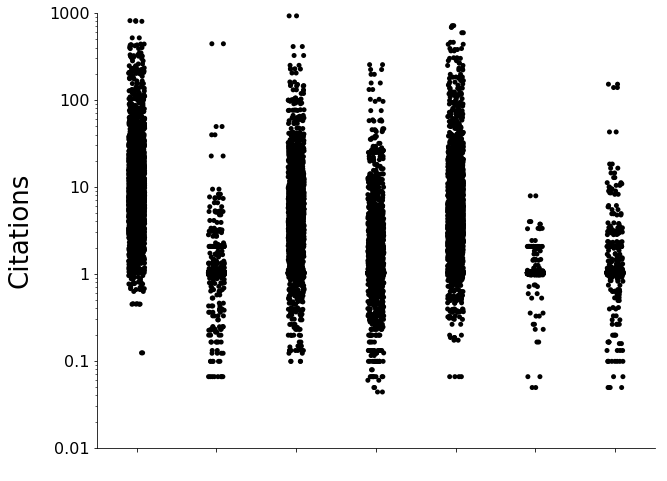

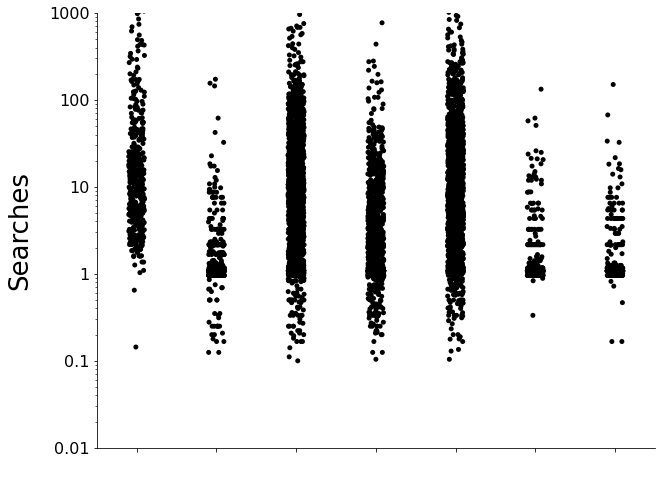

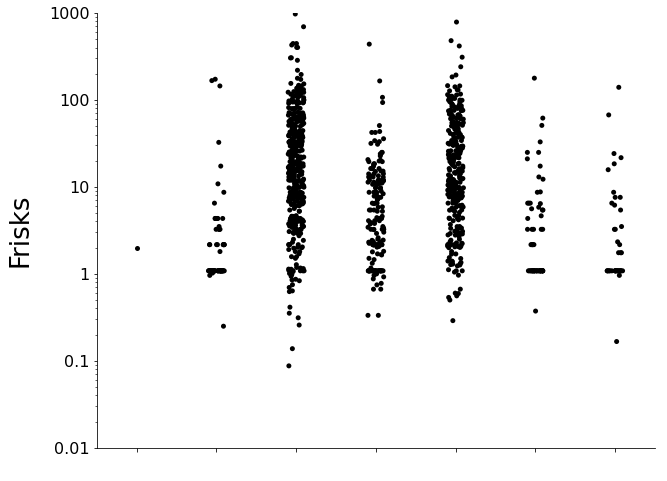

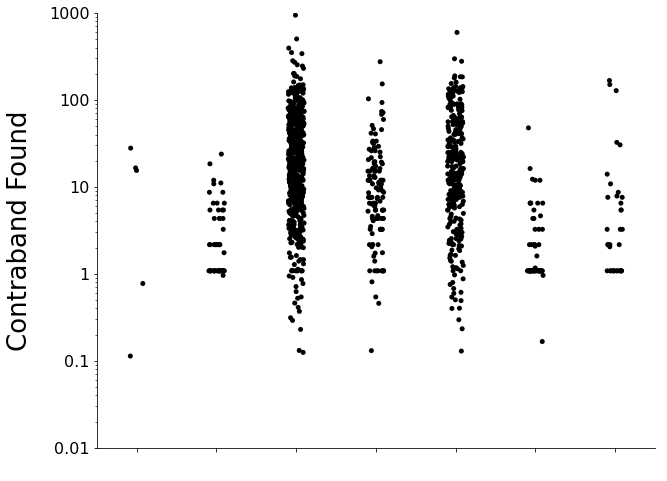

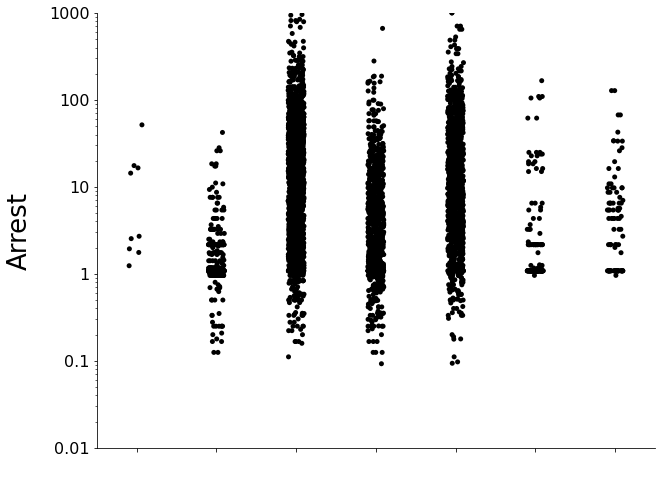

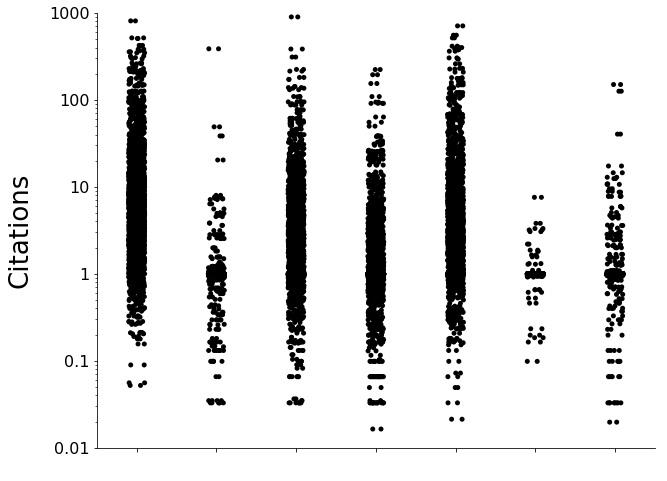

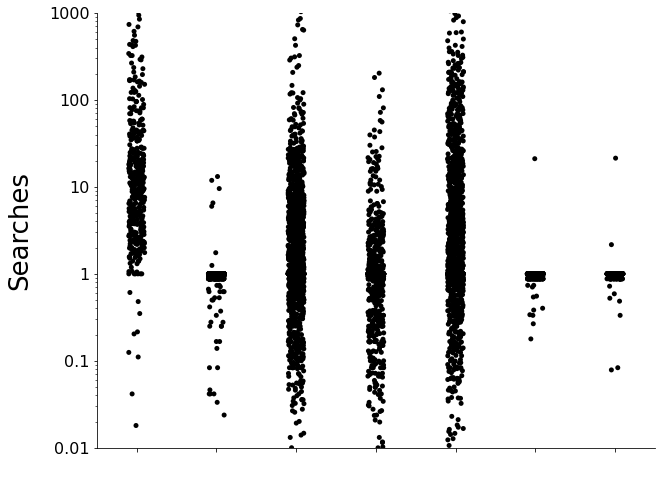

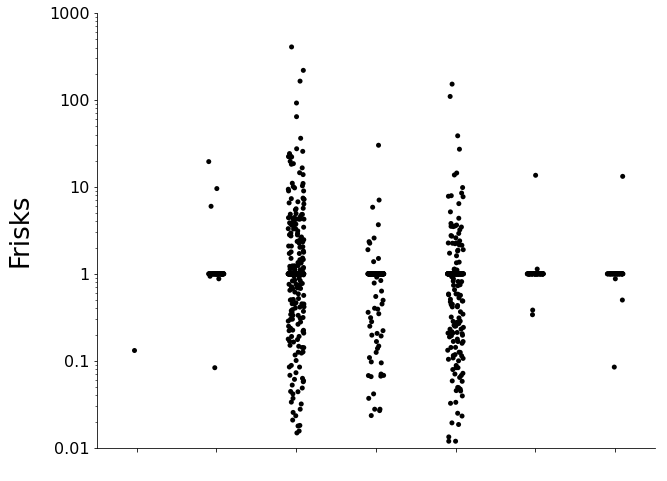

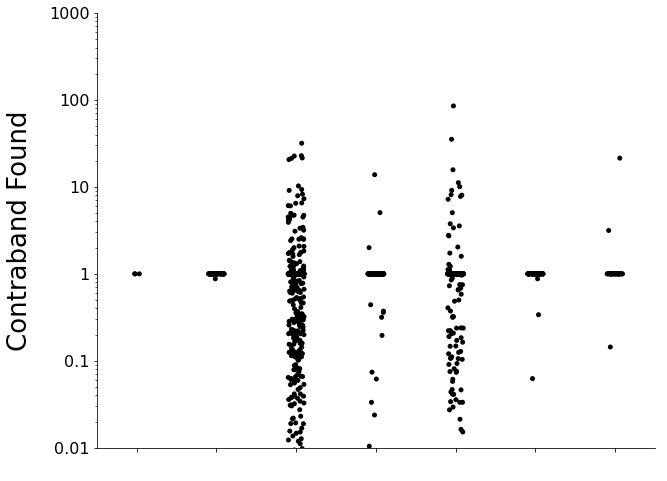

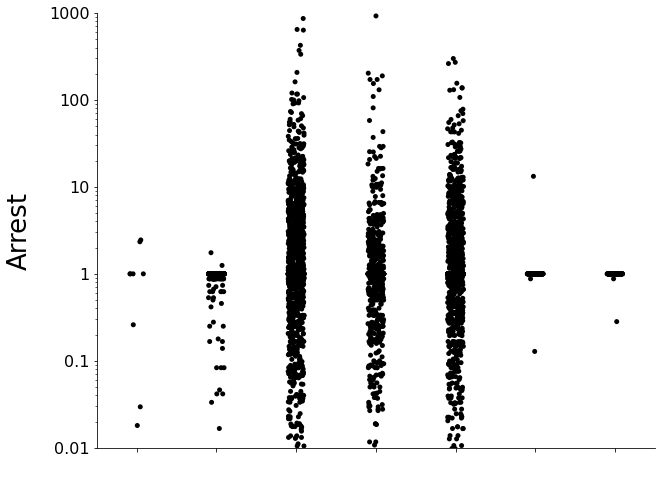

In [28]:
#%% Stripplots of fit distributions
def strip_plot(df, y_label, x_type, y_col, hue_col=None, color=None):
  f, ax = plt.subplots(figsize=(10, 8))
  sns.stripplot(x=x_type, y=y_col, data=df, hue=hue_col, color=color, order=['overall', 'asian/pacific islander', 'black', 'hispanic', 
                                                                             'white', 'other', 'unknown'])
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=26, labelpad=(16))
  plt.ylim(.01, 1000)
  plt.yscale('log')
  plt.yticks(ticks=[.01, .1, 1, 10, 100, 1000], labels=['0.01', '0.1', '1', '10', '100', '1000'], fontsize=16)
  plt.xticks(fontsize=20, color='white')
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  # plt.legend(bbox_to_anchor=(0.975, 1), loc='upper left', ncol=1, fontsize=16, frameon=False)
  plt.show()

strip_plot(df=cite_90, y_label='Citations', x_type='fit_type', y_col='est_k', color='k')
strip_plot(df=searches_90, y_label='Searches', x_type='fit_type', y_col='est_k', color='k')
strip_plot(df=frisks_90, y_label='Frisks', x_type='fit_type', y_col='est_k', color='k')
strip_plot(df=contra_90, y_label='Contraband Found', x_type='fit_type', y_col='est_k', color='k')
strip_plot(df=arrest_90, y_label='Arrest', x_type='fit_type', y_col='est_k', color='k')

strip_plot(df=cite_90, y_label='Citations', x_type='fit_type', y_col='est_re', color='k')
strip_plot(df=searches_90, y_label='Searches', x_type='fit_type', y_col='est_re', color='k')
strip_plot(df=frisks_90, y_label='Frisks', x_type='fit_type', y_col='est_re', color='k')
strip_plot(df=contra_90, y_label='Contraband Found', x_type='fit_type', y_col='est_re', color='k')
strip_plot(df=arrest_90, y_label='Arrest', x_type='fit_type', y_col='est_re', color='k')

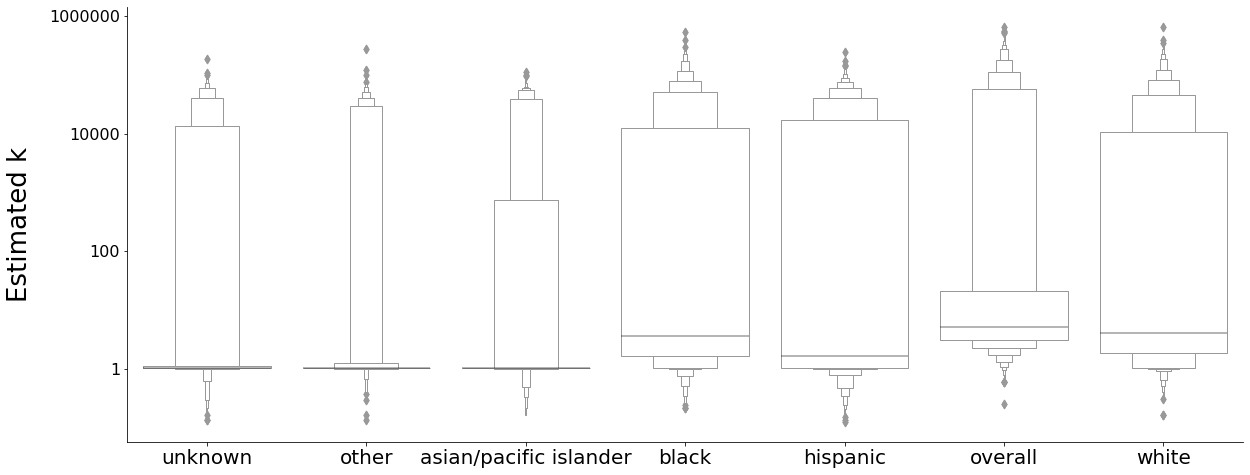

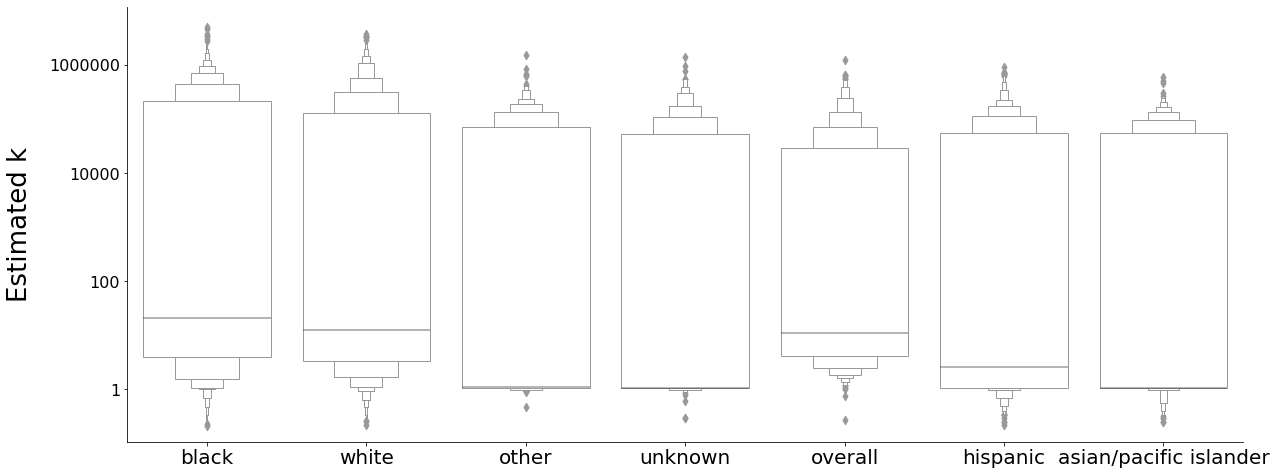

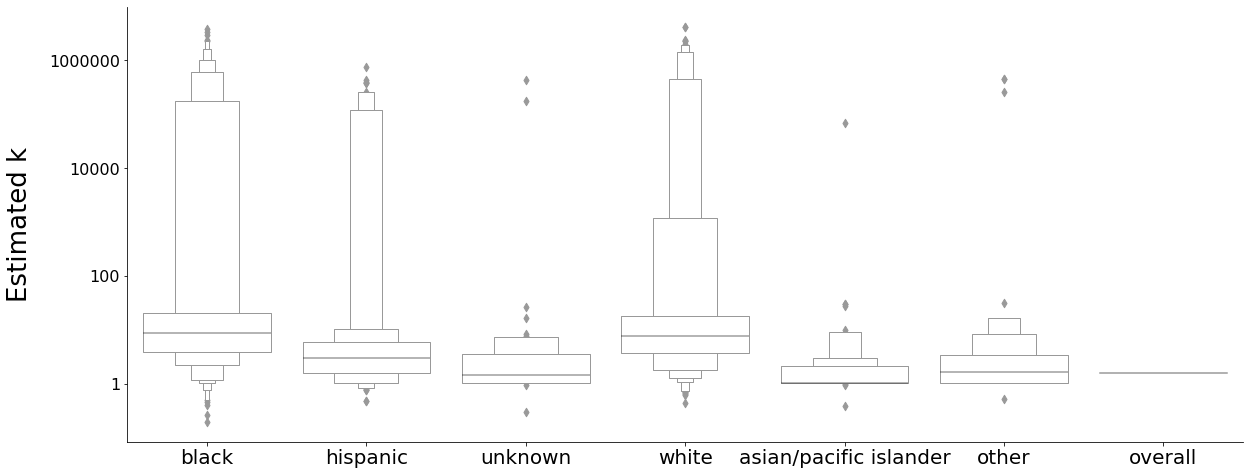

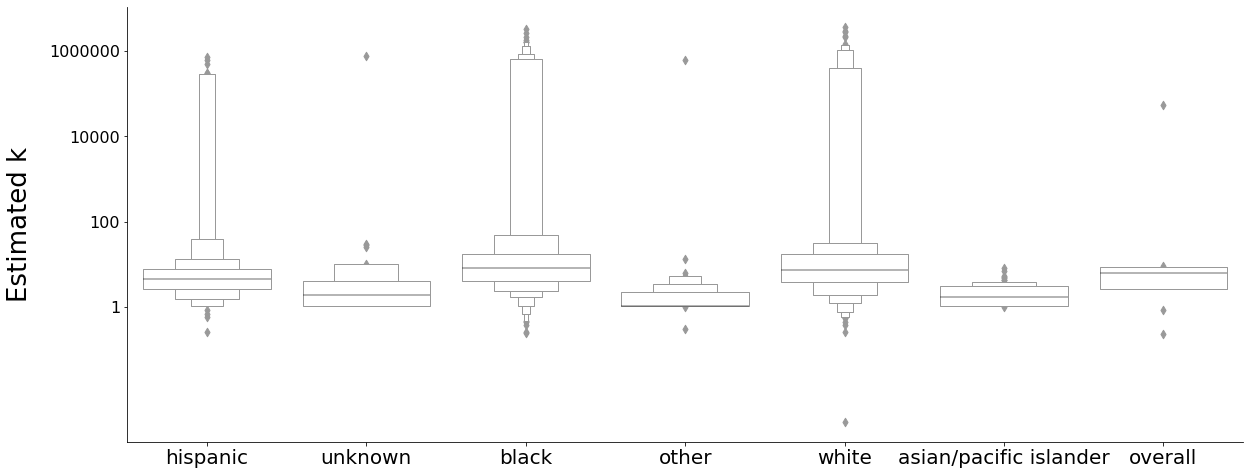

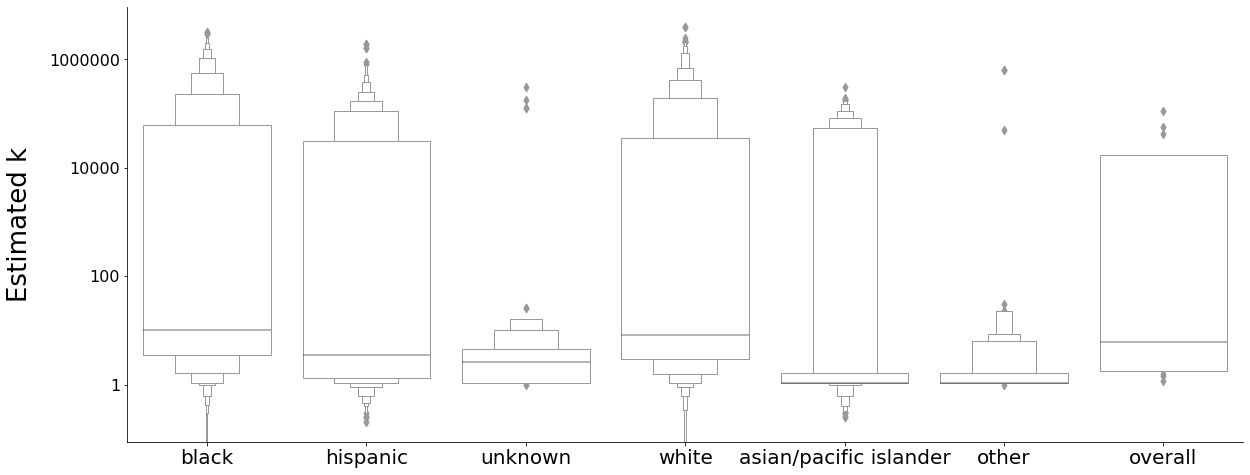

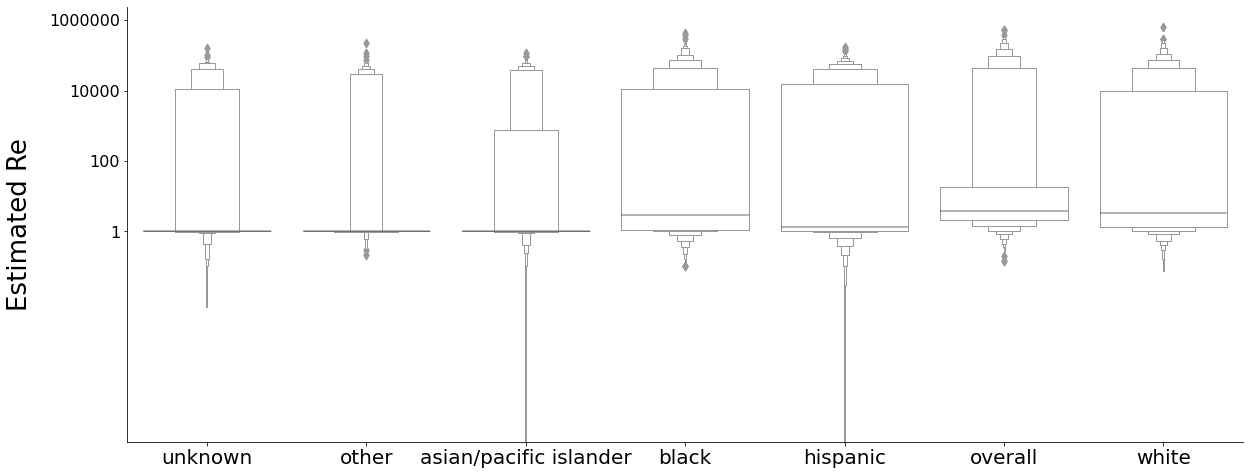

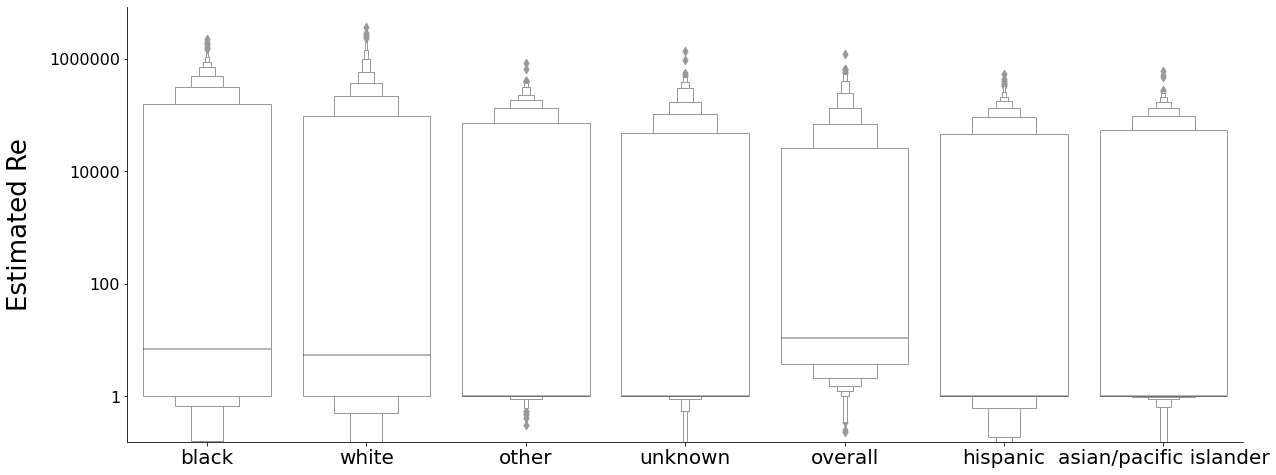

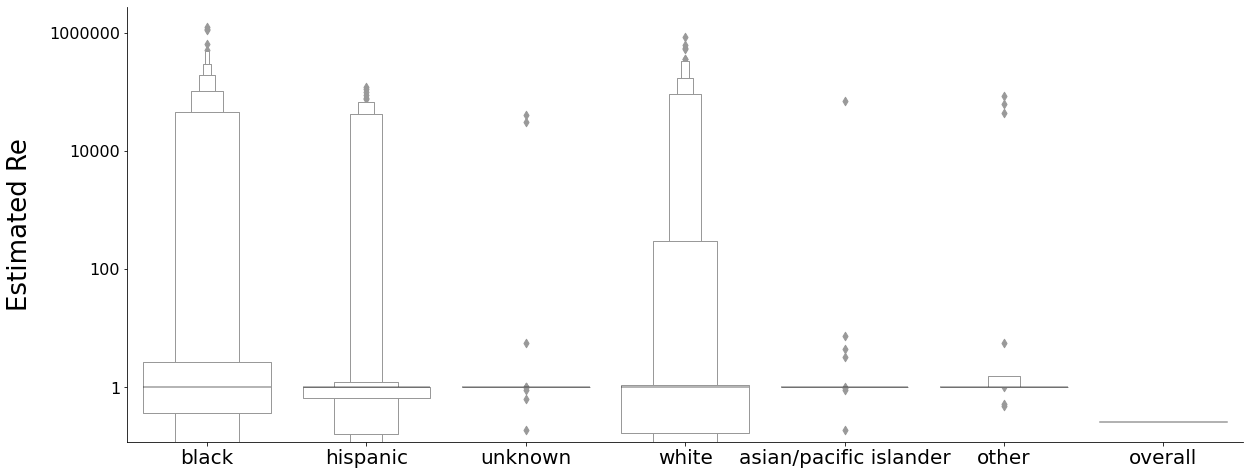

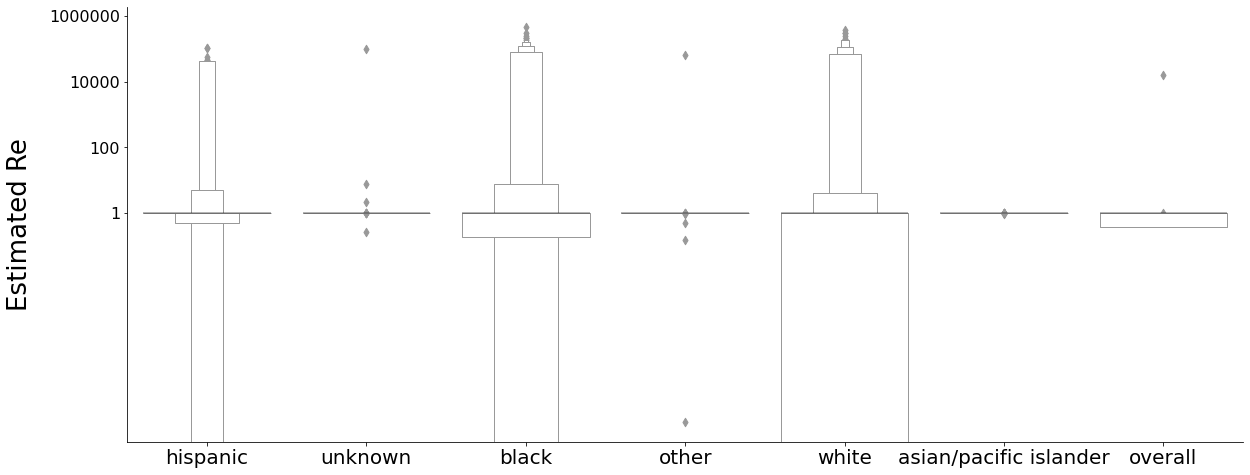

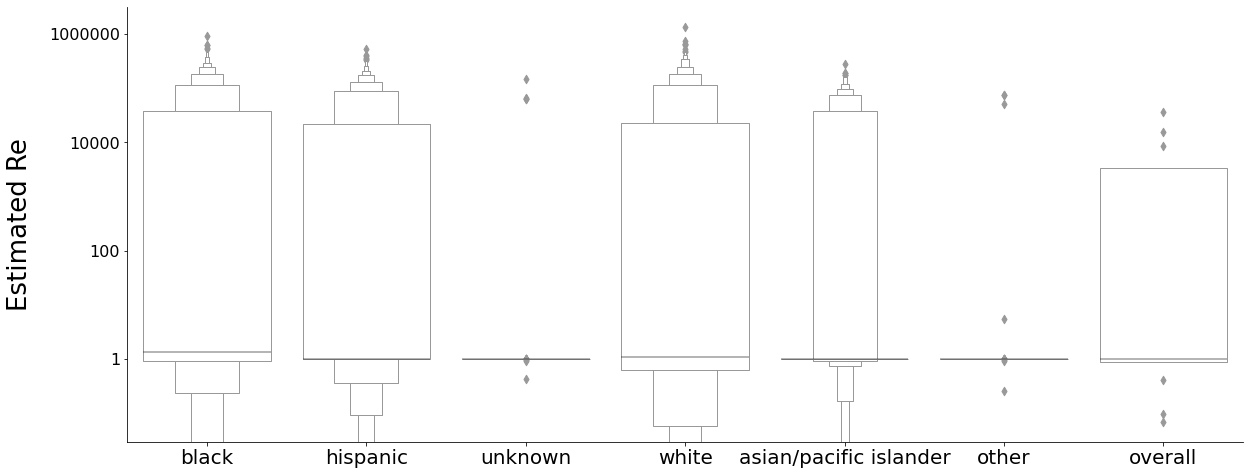

In [ ]:
# Boxenplots of distributions
def boxen_2(df, y_label, x_type, y_col, hue_col=None, color=None):
  f, ax = plt.subplots(figsize=(20, 8))
  sns.boxenplot(x=x_type, y=y_col, data=df, hue=hue_col, dodge=True, color=color)
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=26, labelpad=(16))
  plt.yscale('log')
  plt.yticks(ticks=[1, 1000, 1000000, 1000000000], labels=['1', '100', '10000', '1000000'], fontsize=16)
  plt.xticks(fontsize=20)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()

boxen_2(df=cite_90, y_label='Estimated k', x_type='fit_type', y_col='est_k', color='white')
boxen_2(df=searches_90, y_label='Estimated k', x_type='fit_type', y_col='est_k', color='white')
boxen_2(df=frisks_90, y_label='Estimated k', x_type='fit_type', y_col='est_k', color='white')
boxen_2(df=contra_90, y_label='Estimated k', x_type='fit_type', y_col='est_k', color='white')
boxen_2(df=arrest_90, y_label='Estimated k', x_type='fit_type', y_col='est_k', color='white')

boxen_2(df=cite_90, y_label='Estimated Re', x_type='fit_type', y_col='est_re', color='white')
boxen_2(df=searches_90, y_label='Estimated Re', x_type='fit_type', y_col='est_re', color='white')
boxen_2(df=frisks_90, y_label='Estimated Re', x_type='fit_type', y_col='est_re', color='white')
boxen_2(df=contra_90, y_label='Estimated Re', x_type='fit_type', y_col='est_re', color='white')
boxen_2(df=arrest_90, y_label='Estimated Re', x_type='fit_type', y_col='est_re', color='white')